In [3]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
file_paths = glob.glob('./data/*.csv')

In [5]:
#creates a merged df though not sure if this is useful
dataframes = []

for file in file_paths:
    df = pd.read_csv(file, sep=';')
    dataframes.append(df)

merged_df = pd.concat(dataframes)
#merged_df.to_csv('./data/', index=False)



In [6]:
monday = pd.read_csv('./data/monday.csv', sep=';')
tuesday = pd.read_csv('./data/tuesday.csv', sep=';')
wednesday = pd.read_csv('./data/wednesday.csv', sep=';')
thursday = pd.read_csv('./data/thursday.csv', sep=';')
friday = pd.read_csv('./data/friday.csv', sep=';')


In [7]:
monday.describe()

,customer_no
count,4884.000000
mean,718.274365
std,411.839636
min,1.000000
25%,366.000000
50%,720.000000
75%,1070.000000
max,1447.000000


In [8]:
#no missing data
monday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.6+ KB


In [9]:
#this is a datetime index
datetime = pd.to_datetime(monday['timestamp'])
monday.index = pd.DatetimeIndex(datetime)
monday = monday.drop(['timestamp'], axis=1)

In [10]:
thursday.groupby(['customer_no']).size().mean()


3.3250814332247556

<Axes: ylabel='Count'>

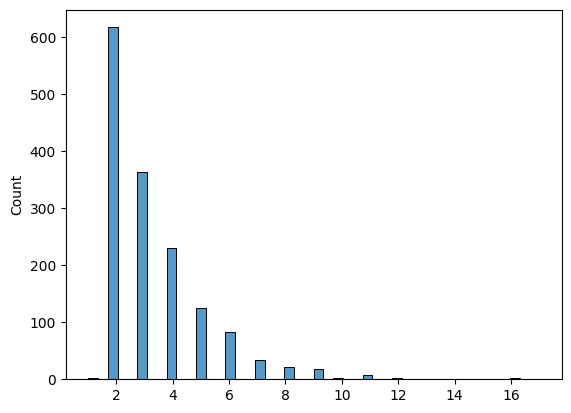

In [11]:
sns.histplot(friday.groupby(['customer_no']).size())

In [19]:
#this should show the average size of the trips by customer no, they all hover around 3.3 as an average, its a right skewed tail on all of them

monday.groupby(['customer_no']).size().mean()



3.3752591568762957

<Axes: ylabel='Count'>

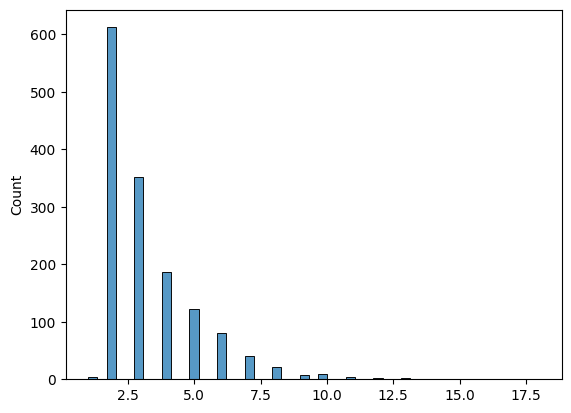

In [13]:
#this confirms the right skew of the tail
sns.histplot(monday.groupby(['customer_no']).size())

In [14]:
monday.groupby(by=['timestamp']).nunique()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,2,1
2019-09-02 07:04:00,6,3
2019-09-02 07:05:00,4,3
2019-09-02 07:06:00,8,5
2019-09-02 07:07:00,4,4
...,...,...
2019-09-02 21:46:00,6,4
2019-09-02 21:47:00,6,3
2019-09-02 21:48:00,7,4


In [15]:
#unstack is super useful in context, need to figure that one out a bit
monday.groupby(['timestamp', 'location']).count().unstack(level=1).fillna(0)

customer_no                          
location               checkout dairy drinks fruit spices
timestamp                                                
2019-09-02 07:03:00         0.0   2.0    0.0   0.0    0.0
2019-09-02 07:04:00         0.0   2.0    0.0   1.0    3.0
2019-09-02 07:05:00         2.0   1.0    1.0   0.0    0.0
2019-09-02 07:06:00         2.0   2.0    1.0   2.0    1.0
2019-09-02 07:07:00         1.0   1.0    1.0   0.0    1.0
...                         ...   ...    ...   ...    ...
2019-09-02 21:46:00         1.0   0.0    2.0   1.0    2.0
2019-09-02 21:47:00         2.0   2.0    0.0   2.0    0.0
2019-09-02 21:48:00         2.0   2.0    2.0   0.0    1.0
2019-09-02 21:49:00         2.0   1.0    0.0   2.0    2.0
2019-09-02 21:50:00         0.0   1.0    0.0   1.0    0.0

[874 rows x 5 columns]

In [16]:
#there are dupes, add a row to confirm that
monday['duplicate'] = monday.duplicated(['customer_no', 'location'])
monday['duplicate'].value_counts()


duplicate
False    4229
True      655
Name: count, dtype: int64

,customer_no,location,duplicate
timestamp,,,
2019-09-02 07:03:00,1,dairy,False
2019-09-02 07:03:00,2,dairy,False
2019-09-02 07:04:00,3,dairy,False
2019-09-02 07:04:00,4,dairy,False
2019-09-02 07:04:00,5,spices,False
...,...,...,...
2019-09-02 21:49:00,1442,checkout,False
2019-09-02 21:49:00,1444,checkout,False
2019-09-02 21:49:00,1445,dairy,False


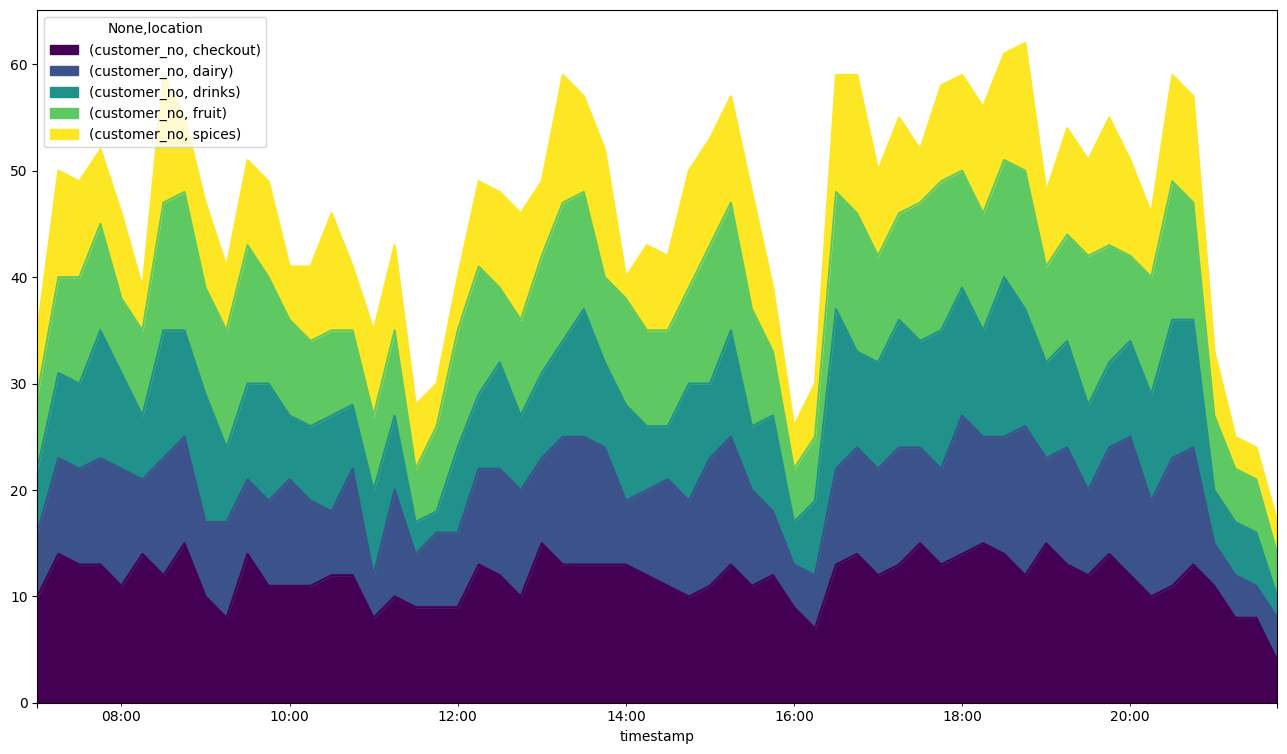

In [17]:
monday.drop('duplicate', axis=1).groupby(['timestamp', 'location']).count().unstack(level=1).resample('15T').count().plot.area(cmap='viridis')
plt.gcf().set_size_inches(16, 9)

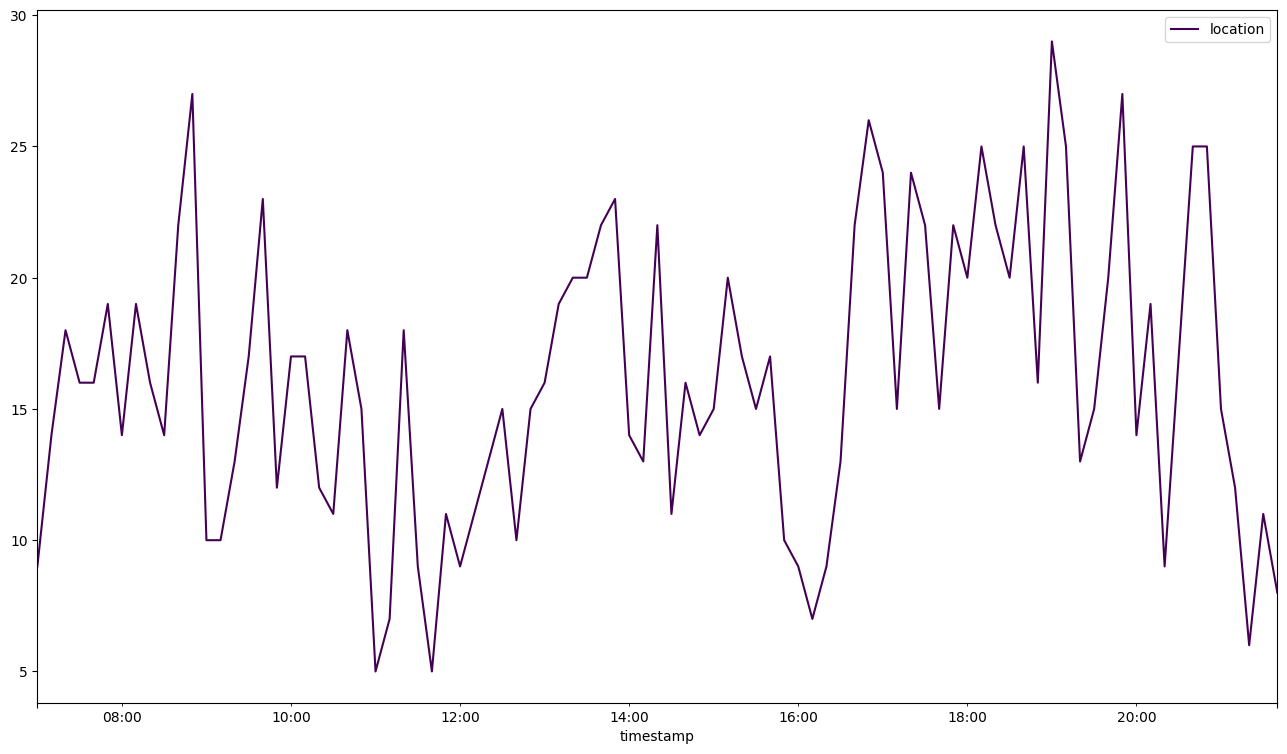

In [18]:
#shows the checkouts over time
monday[monday['location'] == 'checkout'].resample('10T').count().plot(y='location', cmap='viridis')
plt.gcf().set_size_inches(16, 9)